In [ ]:
!pip install BeautifulSoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
import re
# url = 'https://yandex.com.am/weather/ru-RU/details?lat=56.48464&lon=84.947649&lang=ru&via=ms'
# url = 'https://yandex.com.am/weather/?lat=56.48464&lon=84.947649'
# url = 'https://yandex.com.am/weather/?lat=55.75581741&lon=37.61764526'
# url = 'https://meteoinfo.ru/forecasts/russia/tomsk-area/tomsk'
area = input('Введите область: ')
city = input('Введите город: ')
url = f'https://meteoinfo.ru/forecasts/russia/{area}-area/{city}'
print(url)

Введите область: Tomsk
Введите город: Tomsk
https://meteoinfo.ru/forecasts/russia/Tomsk-area/Tomsk


In [ ]:
response = requests.get(url)
if response.status_code == 200:
  print(f'Данные получены, ответ {response.status_code}. Начинаю парсить!')
  soup = BeautifulSoup(response.text, 'html.parser')
  # soup = BeautifulSoup(response.text, 'lxml')
else:
  print(f'Что-то пошло не так, ответ {response.status_code}.')

Данные получены, ответ 200. Начинаю парсить!


In [ ]:
table = soup.find('table', {'class': 'fc_tab_1'})
rows = table.findAll('tr')

In [ ]:
# Даты
dates = []
# Дни недели
weekdays = []
# Дни и ночи
t_days = rows[0].findAll('td')
for day in t_days:
  if day.text:
    index = (day.text.index([num for num in day.text if num in string.digits][0]))
    if dates:
      weekdays.append(day.text[:index])
      weekdays.append(day.text[:index])
      dates.append(day.text[index:])
      dates.append(day.text[index:])
    else:
      weekdays.append(day.text[:index])
      dates.append(day.text[index:])
print(dates)
print(weekdays)

['25 августа', '26 августа', '26 августа', '27 августа', '27 августа', '28 августа', '28 августа', '29 августа', '29 августа', '30 августа', '30 августа', '31 августа', '31 августа']
['Воскресенье', 'Понедельник', 'Понедельник', 'Вторник', 'Вторник', 'Среда', 'Среда', 'Четверг', 'Четверг', 'Пятница', 'Пятница', 'Суббота', 'Суббота']


In [ ]:
# Облачность, осадки (день)
clouds = []
t_clouds = rows[1].findAll('td')
# Дни
days_nights = [t_clouds[0].text] * 7
for cloud in t_clouds:
  match = re.findall(r'(title=".+")', str(cloud))
  if match:
    clouds.append(match[0].replace('title=', '').replace('"', ''))
print(clouds)
print(days_nights)

['Облачно, дождь', 'Облачно, дождь', 'Облачно, небольшой дождь', 'Облачно, дождь', 'Переменная облачность, небольшой кратковременный дождь', 'Облачно, дождь', 'Облачно, дождь']
['День', 'День', 'День', 'День', 'День', 'День', 'День']


In [ ]:
# Температура (день)
temps = []
t_temp = rows[2].findAll('td')
for temp_max in t_temp:
  if 'T максимальная' not in temp_max.text and temp_max.text != '':
    temps.append(temp_max.text.replace('°', ''))
print(temps)

['23', '19', '19', '19', '22', '19', '17']


In [ ]:
# Вероятность осадков (день)
precs = []
t_precs = rows[4].findAll('td')
for prec in t_precs:
  if 'Осадки, вероятность' not in prec.text and prec.text != '':
    precs.append(prec.text.replace('%', ''))
print(precs)

['85', '95', '84', '87', '83', '79', '75']


In [ ]:
# Направление ветра (день)
wind_directions = []
# Скорость ветра (день)
wind_speeds = []
t_winds = rows[5].findAll('td')
for wind in t_winds:
  match = re.findall(r'(title=".{1,3}")', str(wind))
  if match:
    wind_directions.append(match[0].replace('title=', '').replace('"', ''))
    wind_speeds.append(wind.text.replace(' ', ''))
print(wind_directions)
print(wind_speeds)

['Ю', 'Ю-З', 'Ю-З', 'З', 'Ю-З', 'Ю-З', 'С-З']
['3', '4', '3', '2', '3', '4', '2']


In [ ]:
# Атмосферное давление (день)
presss = []
t_press = rows[6].findAll('td')
for press in t_press:
  if 'Давление, мм рт.ст' not in press.text and press.text != '':
    presss.append(press.text)
print(presss)

['740', '742', '746', '748', '746', '744', '746']


In [ ]:
t_clouds = rows[7].findAll('td')
# Ночи
for index in range(1, 13, 2):
  days_nights.insert(index, t_clouds[0].text)
print(days_nights)

# Облачность, осадки (ночь)
index = 1
for cloud in t_clouds:
  match = re.findall(r'(title=".+")', str(cloud))
  if match:
    clouds.insert(index, match[0].replace('title=', '').replace('"', ''))
    index += 2
print(clouds)

['День', 'Ночь', 'День', 'Ночь', 'День', 'Ночь', 'День', 'Ночь', 'День', 'Ночь', 'День', 'Ночь', 'День']
['Облачно, дождь', 'Облачно, дождь', 'Облачно, дождь', 'Облачно, дождь', 'Облачно, небольшой дождь', 'Облачно, небольшой дождь', 'Облачно, дождь', 'Переменная облачность, небольшой кратковременный дождь', 'Переменная облачность, небольшой кратковременный дождь', 'Облачно, временами небольшой дождь', 'Облачно, дождь', 'Облачно, кратковременный дождь', 'Облачно, дождь']


In [ ]:
# Температура (ночь)
t_temp = rows[8].findAll('td')
index = 1
for temp_max in t_temp:
  if 'T минимальная' not in temp_max.text and temp_max.text != '':
    temps.insert(index, temp_max.text.replace('°', ''))
    index += 2
print(temps)

['23', '13', '19', '13', '19', '13', '19', '11', '22', '14', '19', '11', '17']


In [ ]:
# Вероятность осадков (ночь)
t_precs = rows[10].findAll('td')
index = 1
for prec in t_precs:
  if 'Осадки, вероятность' not in prec.text and prec.text != '':
    precs.insert(index, prec.text.replace('%', ''))
    index += 2
print(precs)

['85', '95', '95', '91', '84', '73', '87', '83', '83', '79', '79', '75', '75']


In [ ]:
# Направление ветра (ночь)
# Скорость ветра (ночь)
t_winds = rows[11].findAll('td')
index = 1
for wind in t_winds:
  match = re.findall(r'(title=".{1,3}")', str(wind))
  if match:
    wind_directions.insert(index, match[0].replace('title=', '').replace('"', ''))
    wind_speeds.insert(index, wind.text.replace(' ', ''))
    index += 2
print(wind_directions)
print(wind_speeds)

['Ю', 'Ю-З', 'Ю-З', 'Ю-З', 'Ю-З', 'Ю-З', 'З', 'Ю-З', 'Ю-З', 'Ю', 'Ю-З', 'З', 'С-З']
['3', '4', '4', '3', '3', '2', '2', '2', '3', '4', '4', '1', '2']


In [ ]:
# Атмосферное давление (ночь)
t_press = rows[12].findAll('td')
index = 1
for press in t_press:
  if 'Давление, мм рт.ст' not in press.text and press.text != '':
    presss.insert(index, press.text)
    index += 2
print(presss)

['740', '739', '742', '744', '746', '747', '748', '748', '746', '745', '744', '745', '746']


In [ ]:
weather = {'Area': [area] * len(dates), 'City': [city] * len(dates), 'Date': dates, 'Weekday': weekdays, 'Day/Night': days_nights, 'Cloudiness': clouds, 'Temperature': temps, 'PrecipitationProbability': precs, 'WindDirection': wind_directions, 'WindSpeed': wind_speeds, 'AtmosphericPressure': presss}
df = pd.DataFrame(weather)

In [ ]:
df

,Area,City,Date,Weekday,Day/Night,Cloudiness,Temperature,PrecipitationProbability,WindDirection,WindSpeed,AtmosphericPressure
0,Tomsk,Tomsk,25 августа,Воскресенье,День,"Облачно, дождь",23,85,Ю,3,740
1,Tomsk,Tomsk,26 августа,Понедельник,Ночь,"Облачно, дождь",13,95,Ю-З,4,739
2,Tomsk,Tomsk,26 августа,Понедельник,День,"Облачно, дождь",19,95,Ю-З,4,742
3,Tomsk,Tomsk,27 августа,Вторник,Ночь,"Облачно, дождь",13,91,Ю-З,3,744
4,Tomsk,Tomsk,27 августа,Вторник,День,"Облачно, небольшой дождь",19,84,Ю-З,3,746
5,Tomsk,Tomsk,28 августа,Среда,Ночь,"Облачно, небольшой дождь",13,73,Ю-З,2,747
6,Tomsk,Tomsk,28 августа,Среда,День,"Облачно, дождь",19,87,З,2,748
7,Tomsk,Tomsk,29 августа,Четверг,Ночь,"Переменная облачность, небольшой кратковременн...",11,83,Ю-З,2,748
8,Tomsk,Tomsk,29 августа,Четверг,День,"Переменная облачность, небольшой кратковременн...",22,83,Ю-З,3,746
9,Tomsk,Tomsk,30 августа,Пятница,Ночь,"Облачно, временами небольшой дождь",14,79,Ю,4,745


Python. Домашнее задание 3.
1.	Описание структуры данных
Основными параметрами погоды являются температура, осадки, ветер и атмосферное давление. Однако в базе данных должна быть возможность беспрепятственного добавления дополнительных параметров прогноза погоды. Возможность хранения информации о погоде не только в одном (основном) месте, но и в других произвольных городах может расширить круг пользователей.
Ввиду того, что точность прогноза погоды обратно пропорциональна сроку прогноза, предлагается ограничить период прогнозирования одной неделей с детализацией по дню/ночи.
После наступления даты прогноза погода данные о прогнозе погоды не удаляются из базы, а помечаются как исторические и могут быть использованы в будущем для анализа и/или построения графиков.
Реализация базы данных по хранению информации о прогнозе погоды предлагается в следующем виде.
База данных состоит из трёх таблиц:
•	WeatherCities. Хранятся записи о регионах и городах.
o	idCity – внешний ключ
o	CityArea – облать
o	CityName- название города
•	WeatherParameters. Хранятся записи о параметрах прогноза погоды
o	idParameter – внешний ключ
o	ParamName – название параметра
•	Weather. Хранятся записи о погоде
o	idCity – ключ к таблице WeatherCities
o	idParameter – ключ к таблице WeatherParameters
o	Date – дата записи о погоде
o	WeekDay – день недели
o	Day_Night – ночь или день
o	TextValue – текстовое значение параметра погоды (облачность, осадки, направление верта)
o	NumValue – числовое значение параметра погоды (температура, вероятность осадков, скорость ветра, атмосферное давление)
o	Forecast – прогнозное или историческое значение (булево)


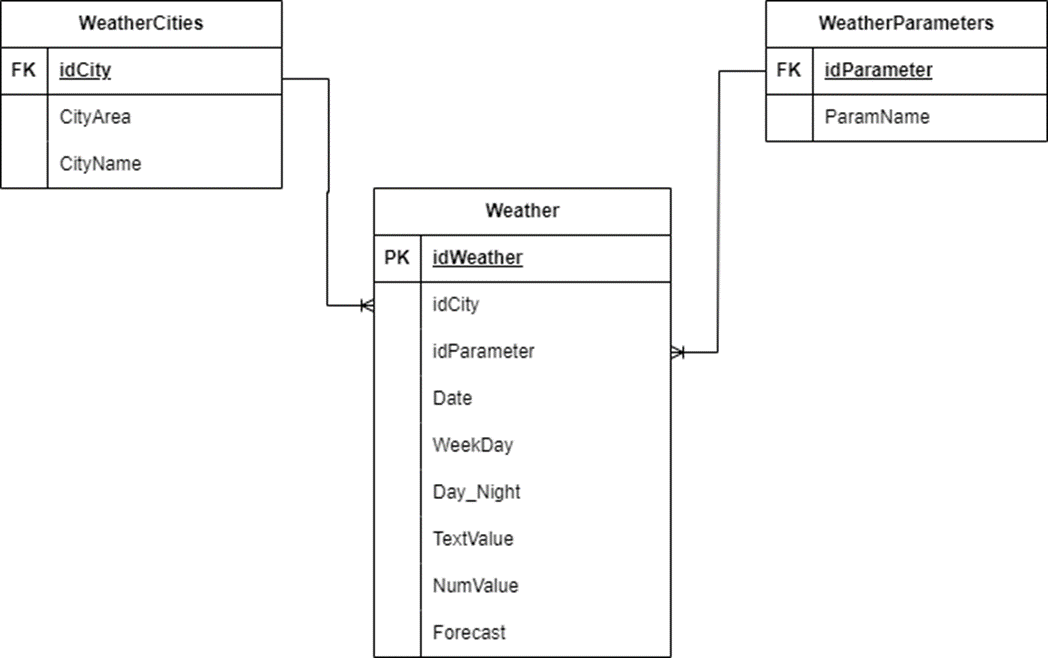

2.	Парсер
Данные о прогнозе погоды получаются с сайта РосГидроМетЦентра (www.meteoinfo.ru). Для работы парсера используются фреймворки requests, BeautifulSoup, Pandas, string, re. Т.к. часть информации в формате хранения в таблице базы данных находится в параметрах тегов html, наряду в библиотекой BeautifulSoup предлагается использование регулярных выражений.
При помощи парсера есть возможность получить прогноз погоды по городу и региону, который вводится пользователем.
С сайта получаются следующие данные о прогнозе погоды:
•	Даты (день, месяц). Прогноз на неделю с детализацией день/ночь.
•	Дни недели (понедельник – воскресенье)
•	Облачность, осадки (текст)
•	Температура (число)
•	Вероятность осадков (число)
•	Направление ветра (текст)
•	Скорость ветра (число)
•	Атмосферное давление (число)
Из полученных и обработанных данных формируется словарь Python, из которого создаётся DataFrame Pandas. Данный DataFrame можно использовать для добавления полученных с сайта данных в базу данных.


3.	Ресурсы
Поскольку потенциальных пользователей системы может быть несколько, то простой вариант базы данных sqlite (возможностей которого вполне хватило бы для реализации идеи) не подойдёт. Необходимо развернуть серверную СУБД (например, PostgreSQL) на корпоративном сервере с выходом в сеть, либо арендовать облачный вариант (например, на pythonanywhere.com). На этом же ресурсе необходимо установить python и запускать скрипт парсера. В зависимости от способа выдачи информации о прогнозе погоды необходимо разработать приложение для работы с пользователем на Flask (если надо выдавать результат в браузер в виде html-страницы) или на FastAPI (если надо передавать информацию, собранную парсером, иному приложению корпорации).
